<a href="https://colab.research.google.com/github/DeveloperSeJin/Study_machine_learning/blob/main/CNNProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

# 합성곱 신경망

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
model = keras.models.Sequential( [
    keras.layers.Conv2D(input_shape = (28, 28, 1),
                        kernel_size = (3,3), padding = 'same', 
                        filters = 32),
     keras.layers.MaxPooling2D((2, 2), strides=2),
     keras.layers.Conv2D(kernel_size = (3,3), padding ='same', 
                        filters = 64),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(kernel_size = (3,3), padding = 'same', 
                        filters = 32),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [23]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 128)       

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 76s 53ms/step - loss: 0.6085 - accuracy: 0.8372 - val_loss: 0.1402 - val_accuracy: 0.9654
Epoch 2/5
1407/1407 [==============================] - 78s 55ms/step - loss: 0.1211 - accuracy: 0.9692 - val_loss: 0.1002 - val_accuracy: 0.9750
Epoch 3/5
1407/1407 [==============================] - 77s 55ms/step - loss: 0.0922 - accuracy: 0.9772 - val_loss: 0.1052 - val_accuracy: 0.9760
Epoch 4/5
1407/1407 [==============================] - 78s 55ms/step - loss: 0.0892 - accuracy: 0.9767 - val_loss: 0.1161 - val_accuracy: 0.9746
Epoch 5/5
1407/1407 [==============================] - 78s 56ms/step - loss: 0.0775 - accuracy: 0.9799 - val_loss: 0.0821 - val_accuracy: 0.9779


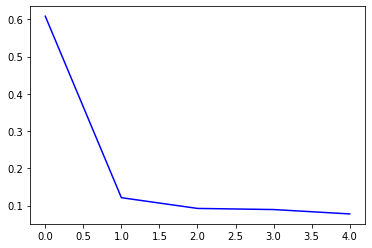

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-')

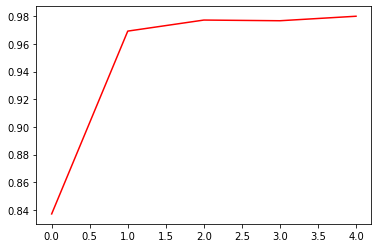

In [33]:
plt.plot(history.history['accuracy'], 'r-')

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('테스트 정확도 : ', test_acc)
print('테스트 데이터의 손실값 : ', test_loss)

313/313 - 8s - loss: 0.0764 - accuracy: 0.9813 - 8s/epoch - 27ms/step
테스트 정확도 :  0.9812999963760376
테스트 데이터의 손실값 :  0.07640685141086578


# 데이터 증강

## 추가 조사 필요

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train[:20]
y_train = y_train[:20]
x_test = x_test[:20]
y_test = y_test[:20]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(20, 28, 28)
(20,)
(20, 28, 28)
(20,)


In [6]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [12]:
datagenerator1 = ImageDataGenerator(
    rotation_range = 20
)
datagenerator2 = ImageDataGenerator(
    width_shift_range = 0.2
)
datagenerator3 = ImageDataGenerator(
    height_shift_range = 0.2
)
datagenerator4 = ImageDataGenerator(
    brightness_range = (0.2, 0.7)
)
datagenerator5 = ImageDataGenerator(
    zoom_range = 20
)
datagenerator6 = ImageDataGenerator(
    horizontal_flip = True
)
datagenerator7 = ImageDataGenerator(
    vertical_flip = True
)
datagenerator8 = ImageDataGenerator(
    preprocessing_function = True
)
datagenerator9 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2
)
datagenerator10 = ImageDataGenerator(
    rotation_range = 20,
    height_shift_range = 0.2
)
datagenerator11 = ImageDataGenerator(
    rotation_range = 20,
    brightness_range = (0.2, 0.7)
)
datagenerator12 = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 20
)
datagenerator13 = ImageDataGenerator(
    rotation_range = 20,
    horizontal_flip = True
)
datagenerator14 = ImageDataGenerator(
    rotation_range = 20,
    vertical_flip = True
)
datagenerator15 = ImageDataGenerator(
    rotation_range = 20,
    preprocessing_function = True
)
datagenerator16 = ImageDataGenerator(
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
datagenerator17 = ImageDataGenerator(
    width_shift_range = 0.2,
    brightness_range = (0.2, 0.7)
)
datagenerator18 = ImageDataGenerator(
    width_shift_range = 0.2,
    zoom_range = 20
)
datagenerator19 = ImageDataGenerator(
    width_shift_range = 0.2,
    horizontal_flip = True
)
datagenerator20 = ImageDataGenerator(
    width_shift_range = 0.2,
    vertical_flip = True
)
datagenerator21 = ImageDataGenerator(
    width_shift_range = 0.2,
    preprocessing_function = True
)
datagenerator22 = ImageDataGenerator(
    height_shift_range = 0.2,
    brightness_range = (0.2, 0.7)
)
datagenerator23 = ImageDataGenerator(
    height_shift_range = 0.2,
    zoom_range = 20
)
datagenerator24 = ImageDataGenerator(
    height_shift_range = 0.2,
    horizontal_flip = True
)
datagenerator25 = ImageDataGenerator(
    height_shift_range = 0.2,
    vertical_flip = True
)
datagenerator26 = ImageDataGenerator(
    height_shift_range = 0.2,
    preprocessing_function = True
)
datagenerator27 = ImageDataGenerator(
    brightness_range = (0.2, 0.7),
    zoom_range = 20
)
datagenerator28 = ImageDataGenerator(
    brightness_range = (0.2, 0.7),
    horizontal_flip = True
)
datagenerator29 = ImageDataGenerator(
    brightness_range = (0.2, 0.7),
    vertical_flip = True
)
datagenerator30 = ImageDataGenerator(
    brightness_range = (0.2, 0.7),
    preprocessing_function = True
)
datagenerator31 = ImageDataGenerator(
    zoom_range = 20,
    horizontal_flip = True
)
datagenerator32 = ImageDataGenerator(
    zoom_range = 20,
    vertical_flip = True
)
datagenerator33 = ImageDataGenerator(
    zoom_range = 20,
    preprocessing_function = True
)
datagenerator34 = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)
datagenerator35 = ImageDataGenerator(
    horizontal_flip = True,
    preprocessing_function = True
)
datagenerator36 = ImageDataGenerator(
    vertical_flip = True,
    preprocessing_function = True
)
datagenerator37 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)
datagenerator38 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    brightness_range = (0.2, 0.7)
)
datagenerator39 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    zoom_range = 20
)
datagenerator40 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    horizontal_flip = True
)
datagenerator41 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    vertical_flip = True
)
datagenerator42 = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    preprocessing_function = True
)
datagenerator43 = ImageDataGenerator(
    rotation_range = 20,
    height_shift_range = 0.2,
    brightness_range = (0.2, 0.7)
)
datagenerator44 = ImageDataGenerator(
    rotation_range = 20,
    height_shift_range = 0.2,
    zoom_range = 20
)
datagenerator45 = ImageDataGenerator(
    rotation_range = 20,
    height_shift_range = 0.2,
    horizontal_flip = True
)
datagenerator46 = ImageDataGenerator(
    rotation_range = 20,
    height_shift_range = 0.2,
    vertical_flip = True
)
datagenerator47 = ImageDataGenerator(
    rotation_range = 20,
    height_shift_range = 0.2,
    preprocessing_function = True
)
datagenerator48 = ImageDataGenerator(
    rotation_range = 20,
    brightness_range = (0.2, 0.7),
    zoom_range = 20
)
datagenerator49 = ImageDataGenerator(
    rotation_range = 20,
    brightness_range = (0.2, 0.7),
    horizontal_flip = True
)
datagenerator50 = ImageDataGenerator(
    rotation_range = 20,
    brightness_range = (0.2, 0.7),
    vertical_flip = True
)
datagenerator51 = ImageDataGenerator(
    rotation_range = 20,
    brightness_range = (0.2, 0.7),
    preprocessing_function = True
)

augmentation_x = next(iter(datagenerator1.flow(x_train)))
augmentation_x = np.append(augmentation_x, next(iter(datagenerator2.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator3.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator4.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator5.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator6.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator7.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator8.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator9.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator10.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator11.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator12.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator13.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator14.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator15.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator16.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator17.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator18.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator19.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator20.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator21.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator22.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator23.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator24.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator25.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator26.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator27.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator28.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator29.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator30.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator31.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator32.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator33.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator34.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator35.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator36.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator37.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator38.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator39.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator40.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator41.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator42.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator43.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator44.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator45.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator46.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator47.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator48.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator49.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator50.flow(x_train))), axis = 0)
augmentation_x = np.append(augmentation_x, next(iter(datagenerator51.flow(x_train))), axis = 0)

y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)
y_train = np.insert(y_train, 0, y_train)

ValueError: ignored

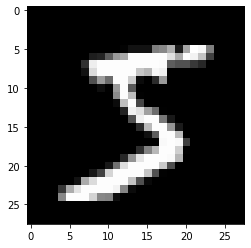

In [65]:
plt.imshow(np.squeeze(x_train[0]), 'gray')

In [67]:
x_test.shape

(20, 28, 28, 1)

In [68]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    epochs=5, validation_split=0.25)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 153ms/step - loss: 1.3294e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 81ms/step - loss: 2.6025e-04 - accuracy: 1.0000 - val_loss: 8.6519e-04 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 130ms/step - loss: 1.6744e-04 - accuracy: 1.0000 - val_loss: 6.9488e-04 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 55ms/step - loss: 4.6089e-05 - accuracy: 1.0000 - val_loss: 5.8521e-04 - val_accuracy: 1.0000


# 전이학습

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

In [3]:
from keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape = (75, 75, 1),
                                include_top = False,
                                weights = None)

In [5]:
from skimage.transform import resize
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train_images = np.array([])
y_train_images = np.array([])
x_test_images = np.array([])
y_test_images = np.array([])

for i in range(60000) :
  np.append(x_train_images, resize(x_train[i],(75, 75)))
  np.append(y_train_images, resize(y_train[i],(75, 75)))

for i in range(10000) :
  np.append(x_test_images, resize(x_test[i],(75, 75)))
  np.append(y_test_images, resize(y_test[i],(75, 75)))

In [7]:
from keras import models, layers
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

my_layer = layers.Flatten()(last_output)
my_layer = layers.Dense(256, activation = 'relu')(my_layer)
my_layer = layers.Dense(256, activation = 'relu')(my_layer)
my_layer = layers.Dense(1, activation = 'sigmoid')(my_layer)

In [13]:
from keras.models import Model

model = Model(pre_trained_model.input, my_layer)

model.compile(optimizer = 'adam',
              loss = 'mse',
              metrics = ['accuracy'],
              run_eagerly=True)

In [14]:
history = model.fit(x_train_images, y_train_images, epochs = 100, shuffle = True)

Epoch 1/100


ValueError: ignored

In [ ]:
plt.plot(history.history['accuracy'], 'r-')

In [ ]:
test_loss, test_acc = model.evaluate(x_test_images, y_test_images, verbose=2)
print('테스트 정확도 : ', test_acc)
print('테스트 데이터의 손실값 : ', test_loss)